# CELL VIABILITY OF AXL MUTANTS

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
from msresist.FileExporter import create_download_link
from msresist.pre_processing import MergeTR
from msresist.figures.figure1 import FC_timecourse, barplot_UtErlAF154, barplotFC_TvsUT

In [2]:
# pd.set_option('display.max_colwidth', 1000)
# pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)

In [3]:
r1 = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/CellViability/Phase/BR1_Phase.csv").dropna()
r2 = pd.read_csv('msresist/data/Phenotypic_data/AXLmutants/CellViability/Phase/BR2_Phase.csv')
r3 = pd.read_csv('msresist/data/Phenotypic_data/AXLmutants/CellViability/Phase/BR3_Phase.csv').iloc[:, :31]
lines = ["PC9", "KO", "KI", "KD", "Y634F", "Y643F", "Y698F", "Y726F", "Y750F ", "Y821F"]

In [4]:
itp = 24
ftp = 120

## Cell Viability

### Time Course

In [5]:
t1 = ["UT", "A/E", "-E"]
t2 = ["Untreated", "Erl + AF154", "Erlotinib"]
ylabel = "fold-change to t=" + str(itp) + "h"

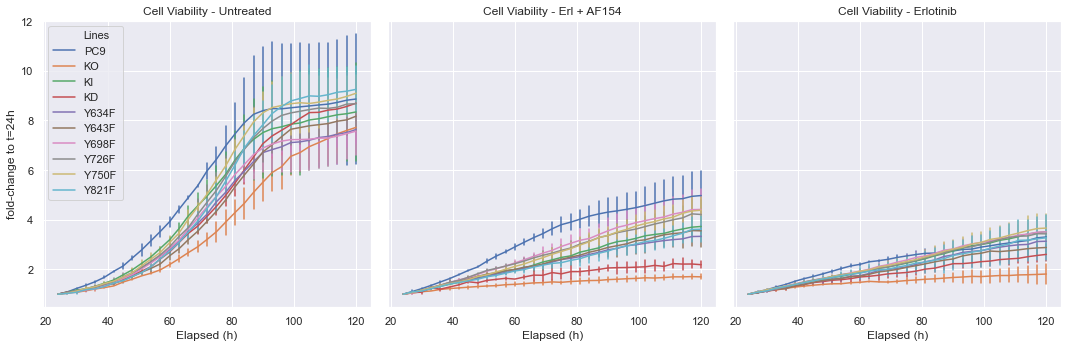

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True, sharex=True)

for i in range(len(t1)):
    title = "Cell Viability - " + t2[i]
    FC_timecourse(ax[i], r2, itp, ftp, lines, t1[i], title, ylabel, r2=r3, FC=True)

plt.tight_layout()

### At specified endpoint

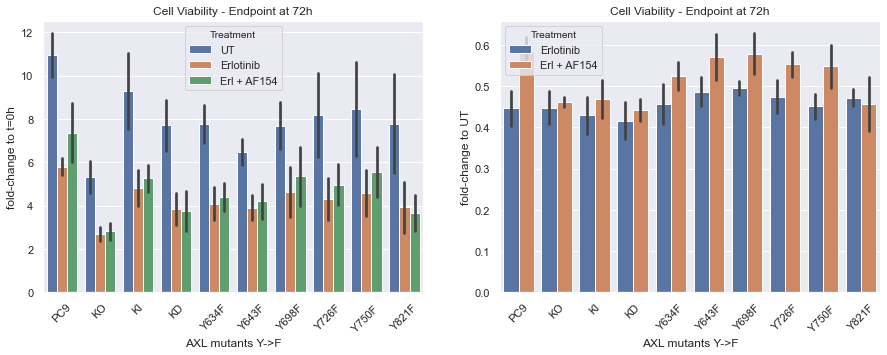

In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

ftp = 72
itp = 0
barplot_UtErlAF154(ax[0], lines, r1, itp, ftp, r2=r2, r3=r3, FC=True)
barplotFC_TvsUT(ax[1], r1, itp, ftp, lines, r2=r2, r3=r3, FC=False)

## Cell Death

### Count of apoptotic cells

### Time Course

In [8]:
red2 = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/CellViability/Red/BR2_RedCounts.csv")
red3 = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/CellViability/Red/BR3_RedCounts.csv")

In [9]:
ftp = 120
ylabel = "YOYO+ cell count (" + str(ftp) + "h)"

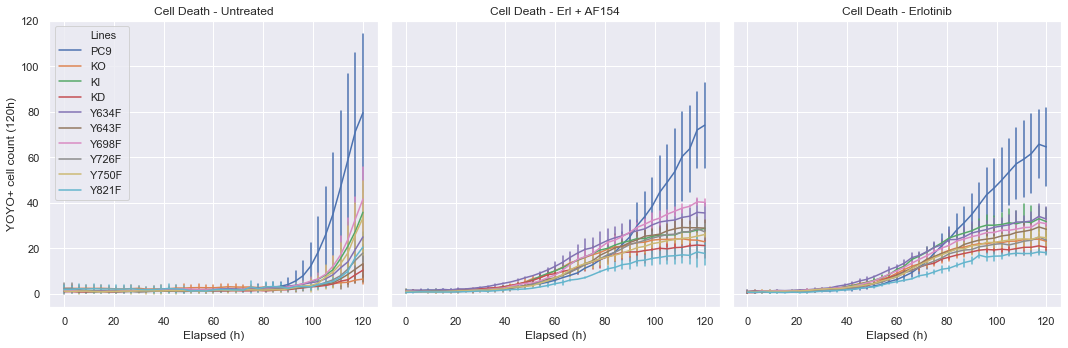

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=True, sharex=True)

for i in range(len(t1)):
    title = "Cell Death - " + t2[i]
    FC_timecourse(ax[i], red2, itp, ftp, lines, t1[i], title, ylabel, r2=red3, FC=False)

plt.tight_layout()

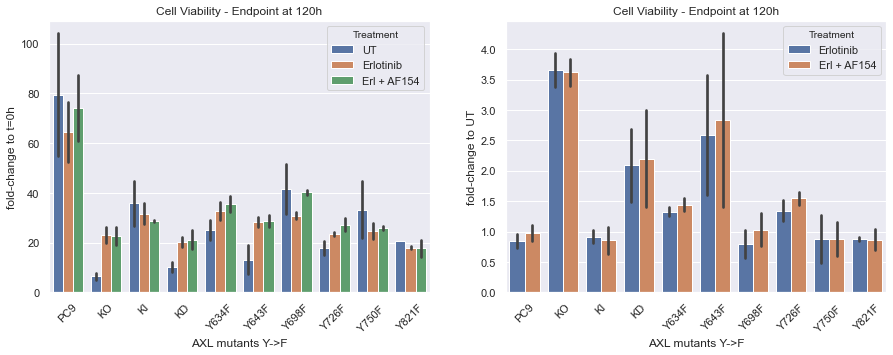

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

ftp = 120
itp = 0
barplot_UtErlAF154(ax[0], lines, red2, itp, ftp, r2=red3, FC=False)
barplotFC_TvsUT(ax[1], red2, itp, ftp, lines, r2=red3, FC=False)

## Cell Migration

### Relative Wound Density

Calculates the density of both the cell region and the wound region as defined by the initial scratch wound mask, and measures (%) of the density of the wound region (W) relative to the density of the cell region(c):


$$ RWD(t) = \frac{W(t)-W(0)}{C(t)-W(0)} $$

In [12]:
mat = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/EMT/03062020-AXLmuts_EMT_RWD_Matrigel_BR1.csv")
col = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/EMT/03062020-AXLmuts_EMT_RWD_Collagen_BR1.csv")

In [13]:
ds = [mat, col]
itp = 0
ftp = 62
t1 = ["UT", "AF", " E", "A/E"]
t2 = ["Untreated", "AF154", "Erlotinib", "Erl + AF154"]
t3 = ["Matrigel", "Collagen"]
ylabel = "Relative Wound Density (" + str(ftp) + "h)"

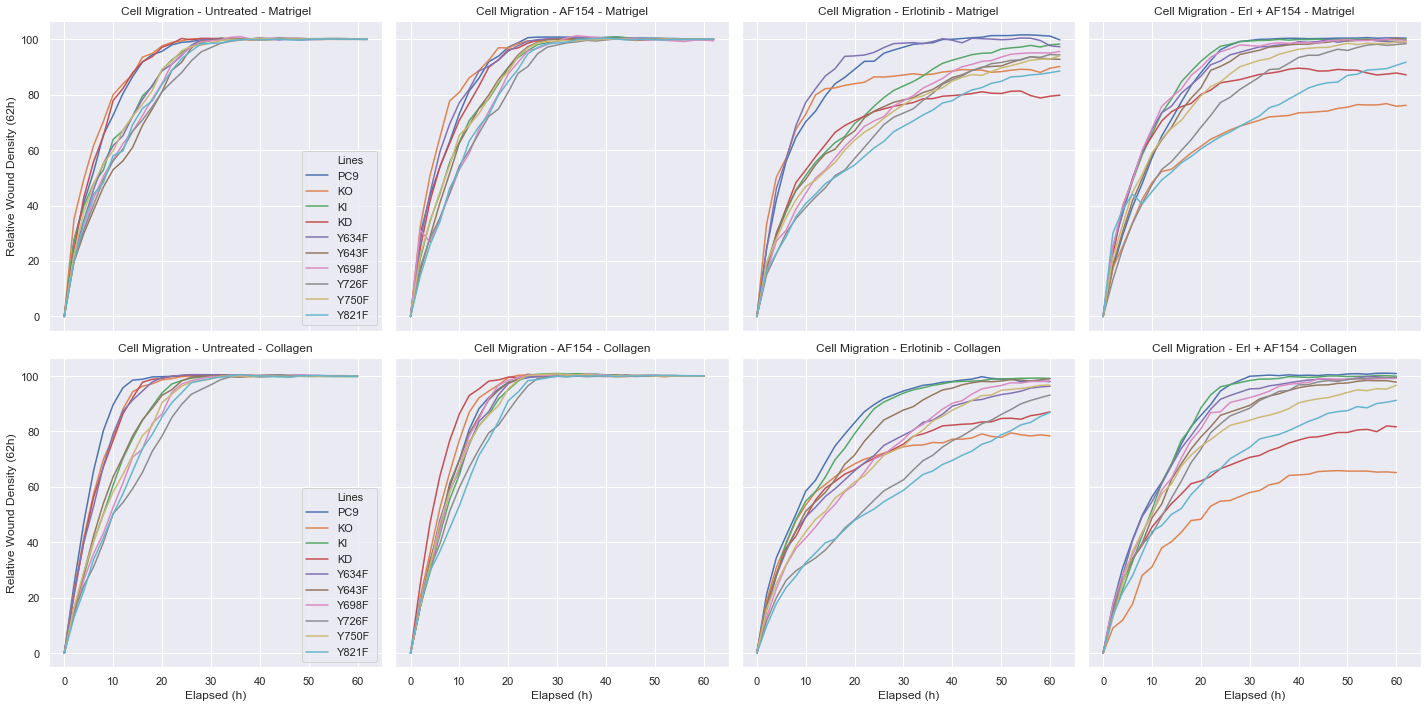

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20, 10), sharey=True, sharex=True)

for i in range(len(t1)):
    for x, d in enumerate(ds):
        title = "Cell Migration - " + t2[i] + " - " + t3[x]
        FC_timecourse(ax[x, i], d, itp, ftp, lines, t1[i], title, ylabel, FC=False)

plt.tight_layout()

### Green Relative Wound Density

In [15]:
gmat = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/EMT/03062020-AXLmuts_EMT_GreenRWD_Matrigel_BR1.csv")
gcol = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/EMT/03062020-AXLmuts_EMT_GreenRWD_Collagen_BR1.csv")

In [16]:
glines = lines[2:]
ds = [gmat, gcol]
ylabel = "Green RWD (" + str(ftp) + "h)"

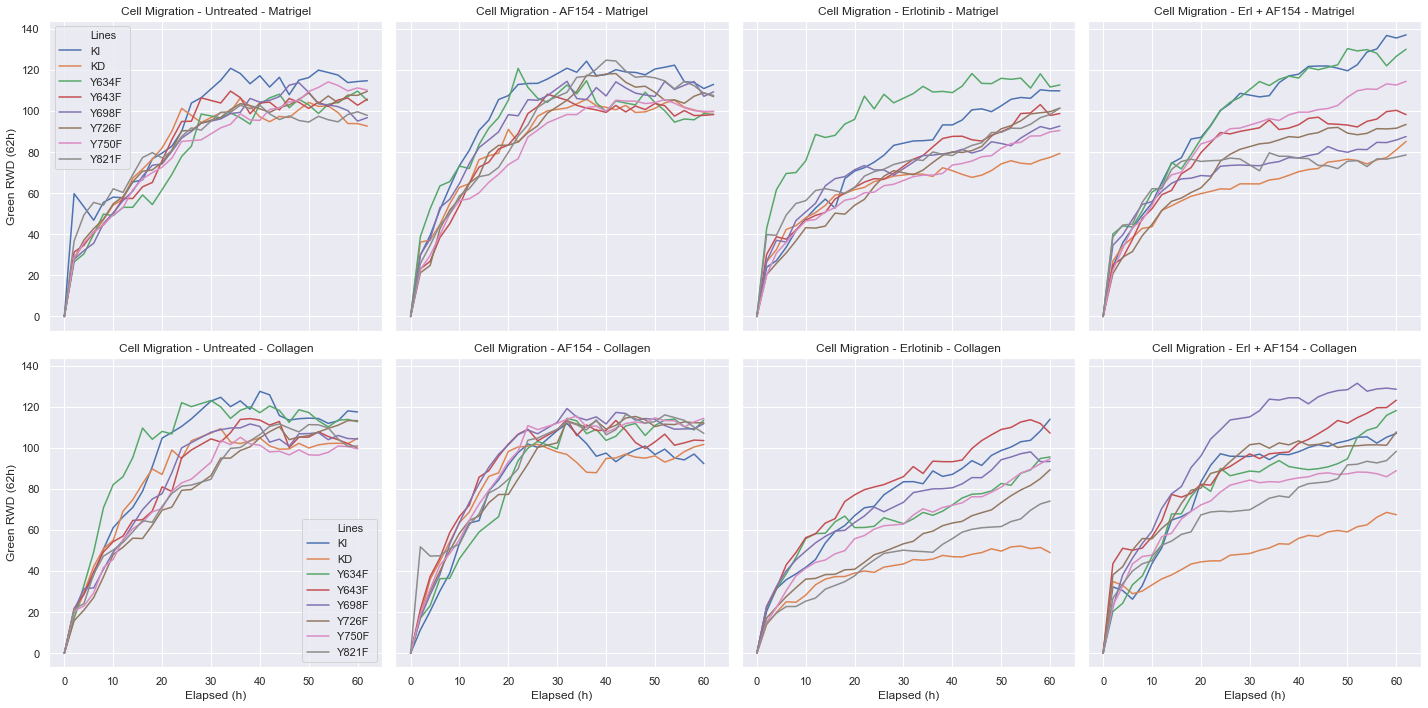

In [17]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20, 10), sharey=True, sharex=True)

for i in range(len(t1)):
    for x, d in enumerate(ds):
        title = "Cell Migration - " + t2[i] + " - " + t3[x]
        FC_timecourse(ax[x, i], d, itp, ftp, glines, t1[i], title, ylabel, FC=False)

plt.tight_layout()

## Wound Width

In [18]:
mat = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/EMT/03062020-AXLmuts_EMT_WW_Matrigel_BR1.csv")
col = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/EMT/03062020-AXLmuts_EMT_WW_Collagen_BR1.csv")
ds = [mat, col]
ylabel = "Wound width (" + str(ftp) + "h)"

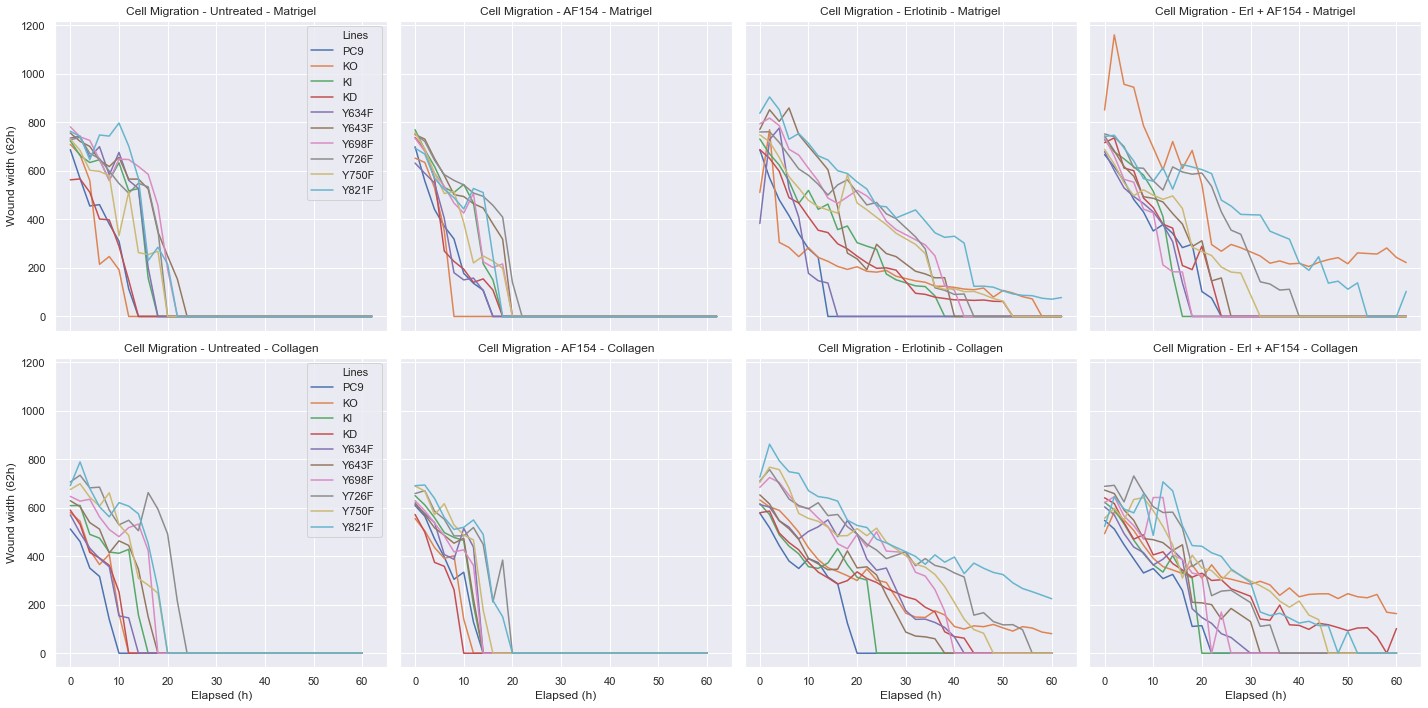

In [19]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20, 10), sharey=True, sharex=True)

for i in range(len(t1)):
    for x, d in enumerate(ds):
        title = "Cell Migration - " + t2[i] + " - " + t3[x]
        FC_timecourse(ax[x, i], d, itp, ftp, lines, t1[i], title, ylabel, FC=False)

plt.tight_layout()

## % Green in Wound

In [20]:
mat = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/EMT/03062020-AXLmuts_EMT_GreenIW_Matrigel_BR1.csv")
col = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/EMT/03062020-AXLmuts_EMT_GreenIW_Collagen_BR1.csv")
ds = [mat, col]
ylabel = "%green in wound (" + str(ftp) + "h)"

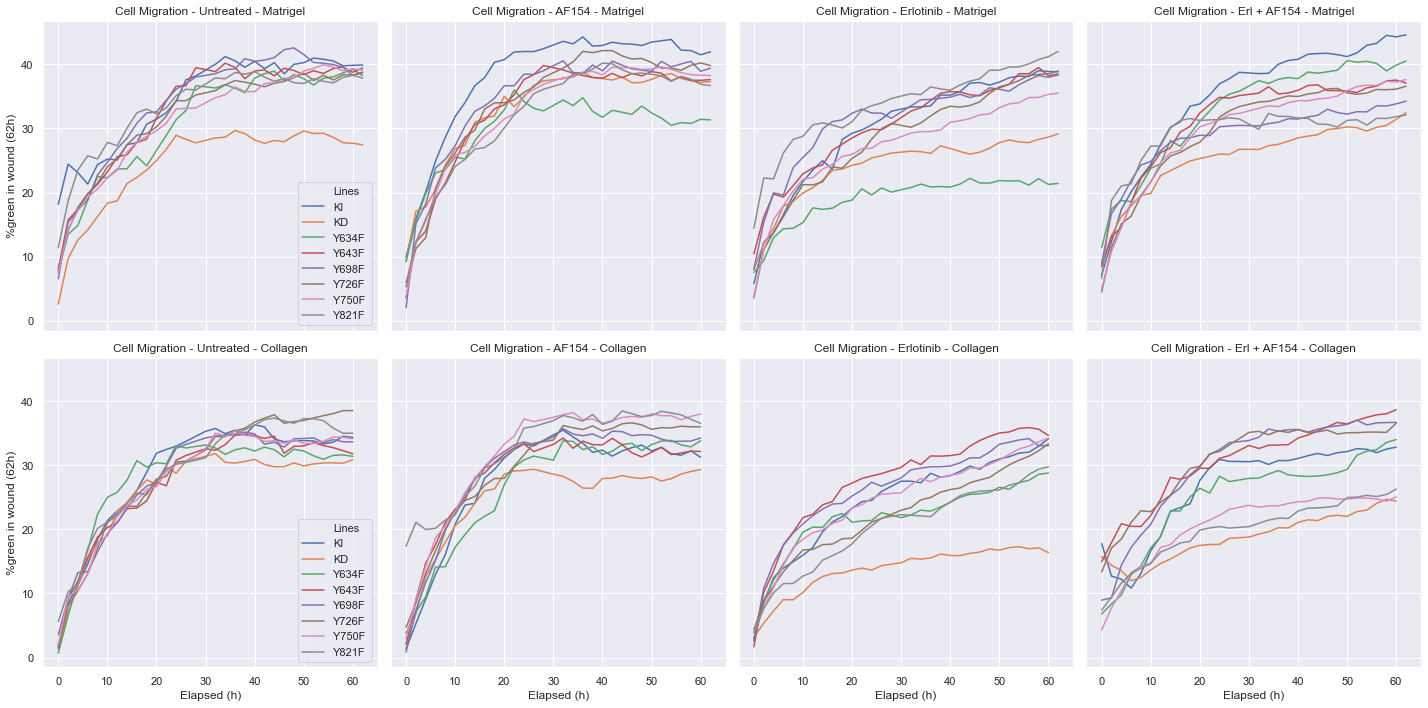

In [21]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20, 10), sharey=True, sharex=True)

for i in range(len(t1)):
    for x, d in enumerate(ds):
        title = "Cell Migration - " + t2[i] + " - " + t3[x]
        FC_timecourse(ax[x, i], d, itp, ftp, glines, t1[i], title, ylabel, FC=False)

plt.tight_layout()

## Wound Confluency

In [22]:
mat = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/EMT/03062020-AXLmuts_EMT_WC_Matrigel_BR1.csv")
col = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/EMT/03062020-AXLmuts_EMT_WC_Collagen_BR1.csv")
ds = [mat, col]
ylabel = "Wound Confluency (" + str(ftp) + "h)"

In [23]:
ftp = 60

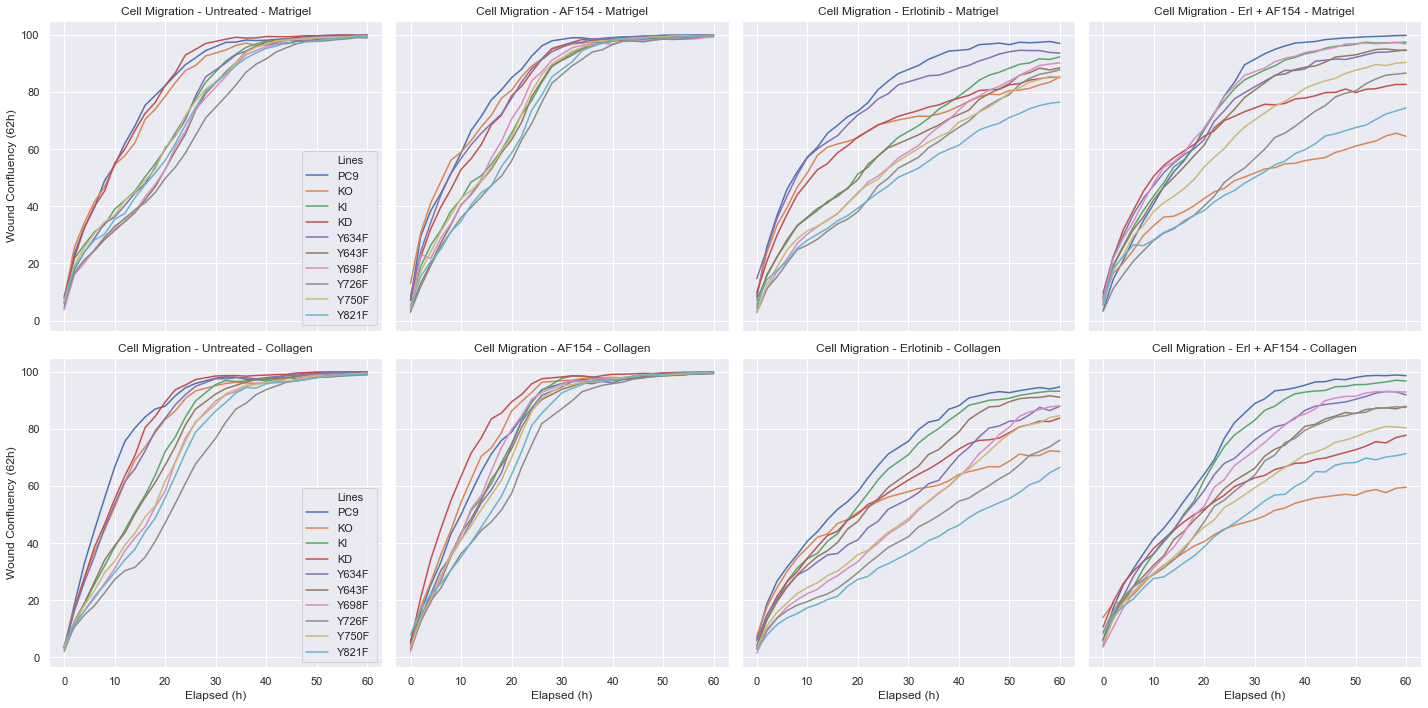

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20, 10), sharey=True, sharex=True)

for i in range(len(t1)):
    for x, d in enumerate(ds):
        title = "Cell Migration - " + t2[i] + " - " + t3[x]
        FC_timecourse(ax[x, i], d, itp, ftp, lines, t1[i], title, ylabel, FC=False)

plt.tight_layout()

## Green Wound Confluency

In [25]:
mat = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/EMT/03062020-AXLmuts_EMT_GreenWC_Matrigel_BR1.csv")
col = pd.read_csv("msresist/data/Phenotypic_data/AXLmutants/EMT/03062020-AXLmuts_EMT_GreenWC_Collagen_BR1.csv")
ds = [mat, col]
ylabel = "Green Wound Confluency (" + str(ftp) + "h)"

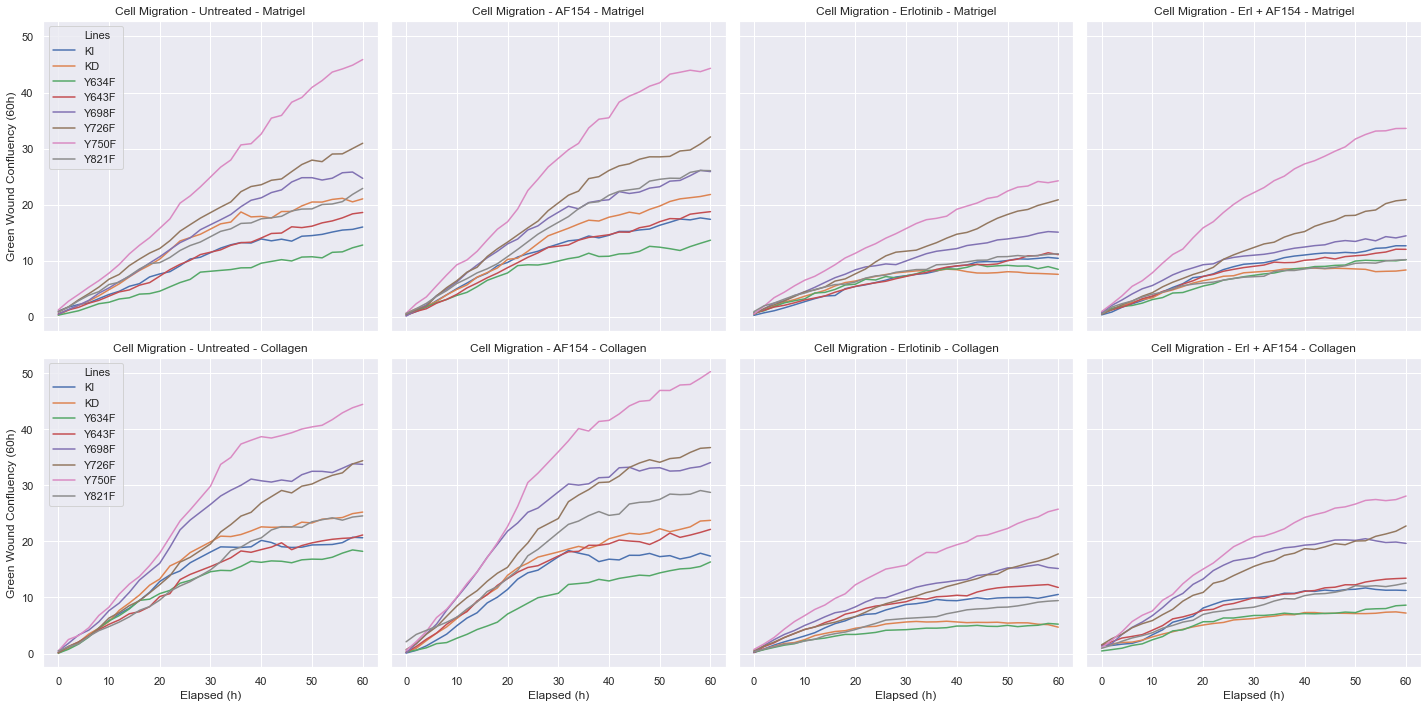

In [26]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(20, 10), sharey=True, sharex=True)

for i in range(len(t1)):
    for x, d in enumerate(ds):
        title = "Cell Migration - " + t2[i] + " - " + t3[x]
        FC_timecourse(ax[x, i], d, itp, ftp, glines, t1[i], title, ylabel, FC=False)

plt.tight_layout()